In [133]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [134]:
from PIL import Image

In [135]:
import math

In [136]:
dataDir = "data/tiny_set/erase_with_uncertain_dataset"

In [137]:
annFile = 'data/tiny_set/erase_with_uncertain_dataset/annotations/tiny_set_test_nobox.json'

In [138]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [139]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
none


In [140]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds();

In [141]:
len(imgIds)

786

In [197]:
imgIds = coco.getImgIds(imgIds = [921])
img = coco.loadImgs(imgIds)[0]

In [198]:
I = Image.open(f"{dataDir}/test/{img['file_name']}").convert('RGB')

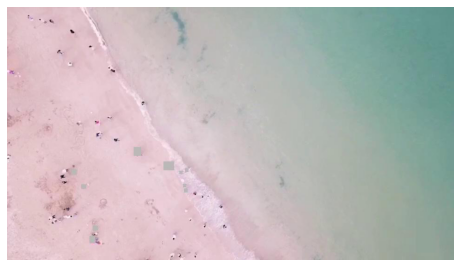

In [199]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
plt.axis('off')
plt.imshow(I)
plt.show()

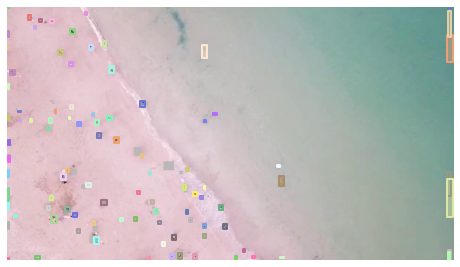

In [202]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
coco.showAnns(ann_921, draw_bbox=True)

In [103]:
img

{'file_name': 'labeled_images/bb_V0014_I0002600.jpg',
 'height': 640,
 'width': 512,
 'id': 10,
 'corner': [1408, 0, 1920, 640]}

In [201]:
ann_921 = [
    {'segmentation': [], "image_id": 921, "category_id": 1, "bbox": [463.4, 467.27, 9.12, 10.97], "score": 0.58}, {"image_id": 921, "category_id": 1, "bbox": [92.62, 447.45, 13.57, 17.02], "score": 0.53}, {"image_id": 921, "category_id": 1, "bbox": [420.02, 465.95, 7.47, 9.75], "score": 0.52}, {"image_id": 921, "category_id": 1, "bbox": [367.59, 529.36, 7.86, 12.3], "score": 0.52}, {"image_id": 921, "category_id": 1, "bbox": [349.73, 531.1, 7.57, 11.75], "score": 0.51}, {"image_id": 921, "category_id": 1, "bbox": [399.16, 532.01, 8.59, 10.21], "score": 0.48}, {"image_id": 921, "category_id": 1, "bbox": [192.56, 271.18, 8.25, 9.9], "score": 0.45}, {"image_id": 921, "category_id": 1, "bbox": [454.95, 425.2, 8.78, 11.59], "score": 0.44}, {"image_id": 921, "category_id": 1, "bbox": [398.8, 397.47, 8.36, 9.22], "score": 0.44}, {"image_id": 921, "category_id": 1, "bbox": [116.03, 359.64, 10.5, 12.64], "score": 0.44}, {"image_id": 921, "category_id": 1, "bbox": [43.69, 17.59, 7.49, 9.56], "score": 0.43}, {"image_id": 921, "category_id": 1, "bbox": [109.26, 92.29, 9.25, 10.99], "score": 0.4}, {"image_id": 921, "category_id": 1, "bbox": [5.41, 135.34, 10.32, 10.78], "score": 0.36}, {"image_id": 921, "category_id": 1, "bbox": [126.13, 347.72, 7.34, 7.09], "score": 0.36}, {"image_id": 921, "category_id": 1, "bbox": [135.49, 47.33, 10.23, 11.51], "score": 0.36}, {"image_id": 921, "category_id": 1, "bbox": [389.77, 453.79, 6.54, 8.71], "score": 0.35}, {"image_id": 921, "category_id": 1, "bbox": [68.82, 24.76, 6.32, 8.14], "score": 0.33}, {"image_id": 921, "category_id": 1, "bbox": [186.12, 494.53, 11.71, 15.17], "score": 0.32}, {"image_id": 921, "category_id": 1, "bbox": [131.51, 118.01, 10.11, 9.72], "score": 0.32}, {"image_id": 921, "category_id": 1, "bbox": [149.96, 247.83, 7.92, 7.33], "score": 0.32}, {"image_id": 921, "category_id": 1, "bbox": [215.18, 234.79, 9.5, 8.04], "score": 0.32}, {"image_id": 921, "category_id": 1, "bbox": [124.75, 429.59, 9.46, 10.3], "score": 0.31}, {"image_id": 921, "category_id": 1, "bbox": [218.34, 127.07, 10.12, 14.23], "score": 0.31}, {"image_id": 921, "category_id": 1, "bbox": [0.51, 319.26, 4.22, 14.23], "score": 0.3}, {"image_id": 921, "category_id": 1, "bbox": [414.62, 406.56, 6.73, 5.64], "score": 0.3}, {"image_id": 921, "category_id": 1, "bbox": [90.64, 25.2, 8.86, 10.03], "score": 0.3}, {"image_id": 921, "category_id": 1, "bbox": [229.11, 280.31, 10.05, 11.1], "score": 0.3}, {"image_id": 921, "category_id": 1, "bbox": [188.48, 243.53, 8.91, 9.35], "score": 0.29}, {"image_id": 921, "category_id": 1, "bbox": [285.6, 201.36, 10.84, 13.59], "score": 0.28}, {"image_id": 921, "category_id": 1, "bbox": [354.33, 489.24, 7.88, 12.71], "score": 0.28}, {"image_id": 921, "category_id": 1, "bbox": [141.01, 442.18, 8.98, 9.06], "score": 0.25}, {"image_id": 921, "category_id": 1, "bbox": [1.13, 286.49, 5.4, 10.86], "score": 0.24}, {"image_id": 921, "category_id": 1, "bbox": [314.65, 435.31, 8.7, 9.86], "score": 0.23}, {"image_id": 921, "category_id": 1, "bbox": [583.28, 363.63, 12.04, 21.89], "score": 0.23}, {"image_id": 921, "category_id": 1, "bbox": [332.06, 505.35, 5.89, 7.4], "score": 0.23}, {"image_id": 921, "category_id": 1, "bbox": [175.02, 81.08, 8.6, 10.73], "score": 0.22}, {"image_id": 921, "category_id": 1, "bbox": [201.47, 414.39, 12.12, 11.9], "score": 0.22}, {"image_id": 921, "category_id": 1, "bbox": [84.8, 257.16, 6.36, 7.82], "score": 0.21}, {"image_id": 921, "category_id": 1, "bbox": [308.08, 414.61, 7.23, 9.54], "score": 0.19}, {"image_id": 921, "category_id": 1, "bbox": [150.41, 476.8, 5.62, 8.22], "score": 0.17}, {"image_id": 921, "category_id": 1, "bbox": [383.14, 436.34, 5.05, 8.09], "score": 0.14}, {"image_id": 921, "category_id": 1, "bbox": [88.89, 239.12, 6.72, 10.05], "score": 0.14}, {"image_id": 921, "category_id": 1, "bbox": [47.63, 240.94, 4.33, 5.33], "score": 0.12}, {"image_id": 921, "category_id": 1, "bbox": [204.57, 74.01, 7.15, 13.18], "score": 0.11}, {"image_id": 921, "category_id": 1, "bbox": [1.52, 232.25, 3.87, 10.0], "score": 0.1}, {"image_id": 921, "category_id": 1, "bbox": [170.03, 379.08, 8.82, 7.71], "score": 0.1}, {"image_id": 921, "category_id": 1, "bbox": [279.1, 394.53, 5.58, 6.88], "score": 0.09}, {"image_id": 921, "category_id": 1, "bbox": [57.49, 40.22, 3.95, 6.12], "score": 0.09}, {"image_id": 921, "category_id": 1, "bbox": [242.45, 454.66, 6.9, 5.53], "score": 0.08}, {"image_id": 921, "category_id": 1, "bbox": [286.4, 316.44, 5.44, 7.06], "score": 0.07}, {"image_id": 921, "category_id": 1, "bbox": [384.9, 346.92, 5.02, 6.63], "score": 0.06}, {"image_id": 921, "category_id": 1, "bbox": [301.15, 536.89, 5.52, 5.28], "score": 0.06}, {"image_id": 921, "category_id": 1, "bbox": [1.51, 414.03, 2.71, 23.13], "score": 0.06}, {"image_id": 921, "category_id": 1, "bbox": [23.62, 222.49, 4.73, 3.41], "score": 0.06}, {"image_id": 921, "category_id": 1, "bbox": [0.96, -6.2, 3.3, 8.33], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [579.53, 339.12, 5.78, 5.61], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [1.57, 81.81, 0.06, 13.46], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [25.64, 242.53, 3.82, 3.52], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [101.61, 221.27, 3.39, 6.24], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [489.12, 535.91, 5.2, 5.4], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [2.15, 390.08, 1.85, 26.32], "score": 0.05}, {"image_id": 921, "category_id": 1, "bbox": [14.89, 446.8, 4.77, 5.15], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [-0.48, 540.48, 4.19, 10.07], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [1.75, 462.33, 1.86, 15.9], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [91.47, 406.79, 6.61, 8.94], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [417.38, 81.77, 11.56, 27.89], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [167.52, 9.9, 3.8, 6.38], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [181.73, 226.83, 4.53, 8.02], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [505.99, 519.32, 3.85, 7.81], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [303.63, 354.16, 4.59, 5.41], "score": 0.04}, {"image_id": 921, "category_id": 1, "bbox": [85.24, 428.52, 6.32, 8.95], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [-0.16, 350.89, 2.55, 15.51], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [945.36, -330.77, 7.53, 11.42], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [954.26, 523.05, -7.72, 29.14], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [950.65, -10.89, -0.35, 16.93], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [239.07, 536.85, 8.88, 5.32], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [952.11, 525.72, -3.86, 85.42], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [526.2, 535.5, 5.28, 5.03], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [422.06, 384.38, 3.79, 7.52], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [135.59, 211.61, 5.54, 6.55], "score": 0.03}, {"image_id": 921, "category_id": 1, "bbox": [324.16, 459.81, 5.29, 7.3], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [422.65, 243.24, 5.14, 3.6], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [181.74, 459.93, 6.92, 9.52], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [957.71, 58.99, -12.84, 58.21], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [131.33, 236.25, 4.11, 4.43], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [0.59, -331.21, 4.73, 11.34], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [954.21, 7.5, -6.55, 56.54], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [1.01, 50.89, 1.38, 13.66], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [0.21, 165.41, 3.44, 10.4], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [442.14, 228.68, 7.52, 4.08], "score": 0.02}, {"image_id": 921, "category_id": 1, "bbox": [271.69, 452.23, 7.11, 7.43], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [661.26, 536.52, 7.02, 1.99], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [58.9, 536.31, 11.88, 6.48], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [585.49, 536.93, 8.59, 3.72], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [377.17, 383.63, 6.11, 9.92], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [954.85, 353.67, -10.2, 52.47], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [0.31, 853.79, 5.7, 13.71], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [420.91, 488.31, 7.17, 9.07], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [957.44, 369.11, -12.89, 82.5], "score": 0.01}, {"image_id": 921, "category_id": 1, "bbox": [946.02, 854.55, 8.48, 12.14], "score": 0.01}, {"image_id": 922, "category_id": 1, "bbox": [1096.22, 474.61, 33.82, 52.24], "score": 0.56}
]